In [88]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [89]:
df = pd.read_csv("train.csv")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [91]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

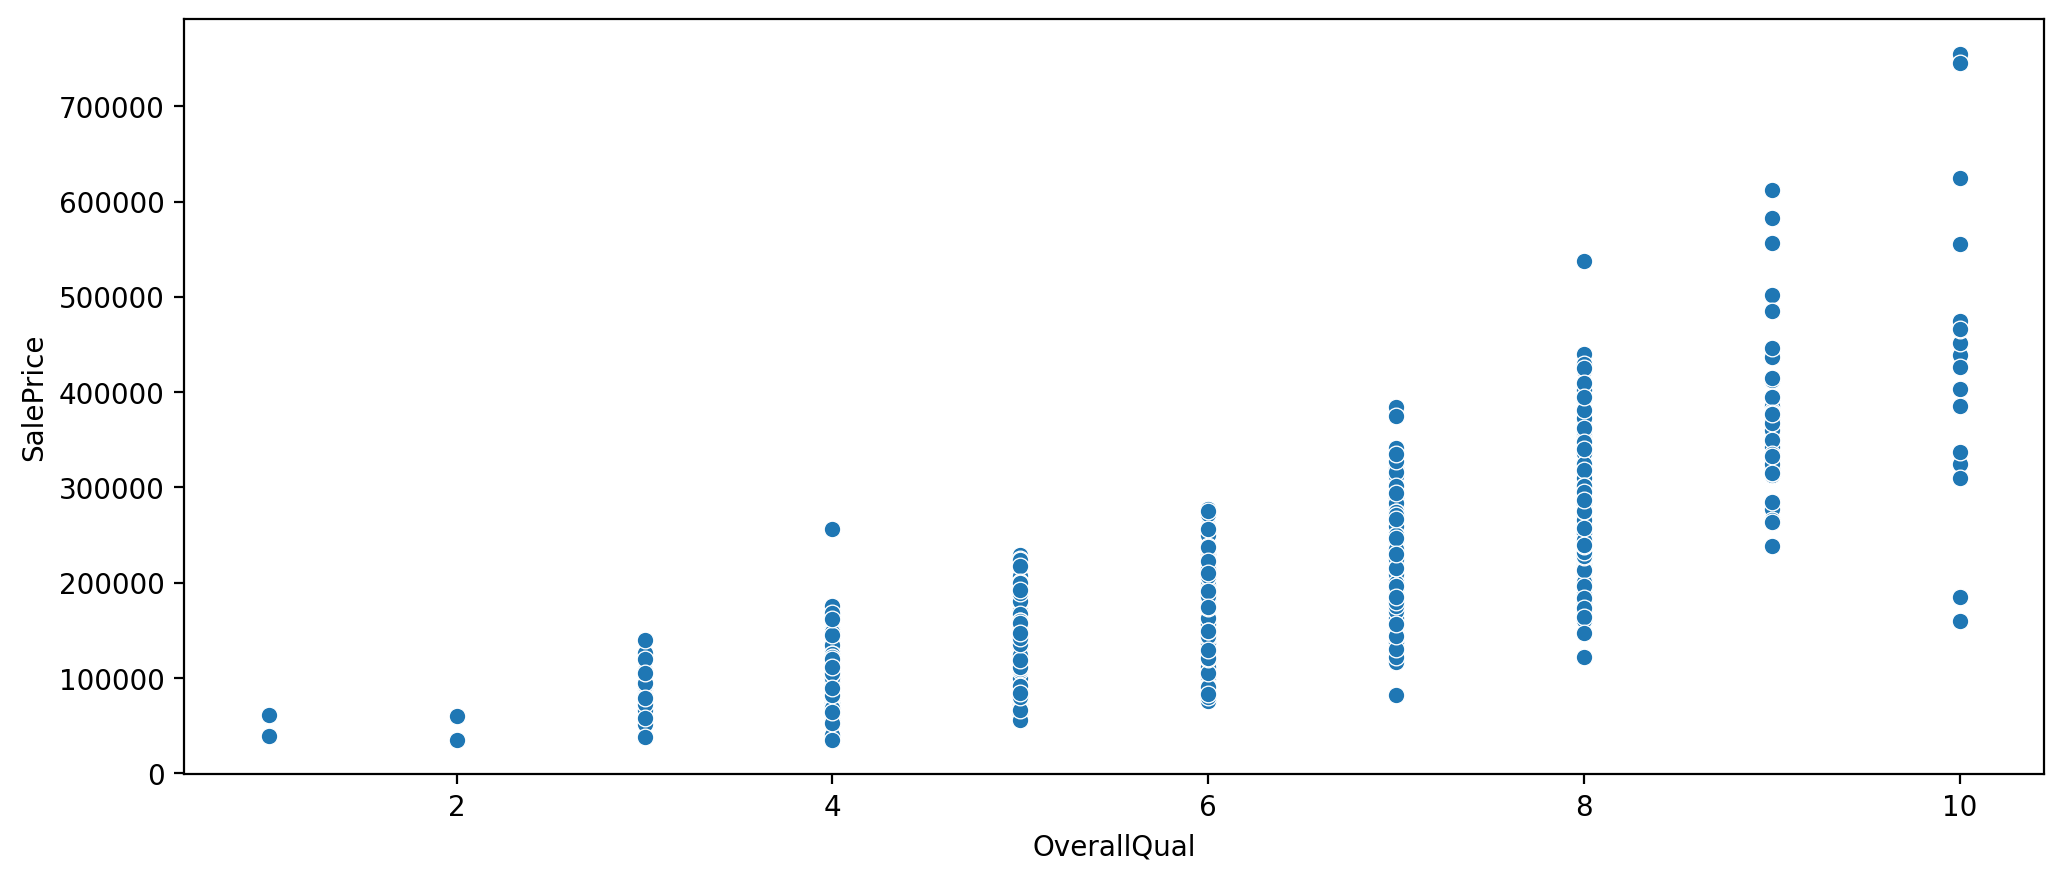

In [93]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df,x='OverallQual',y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

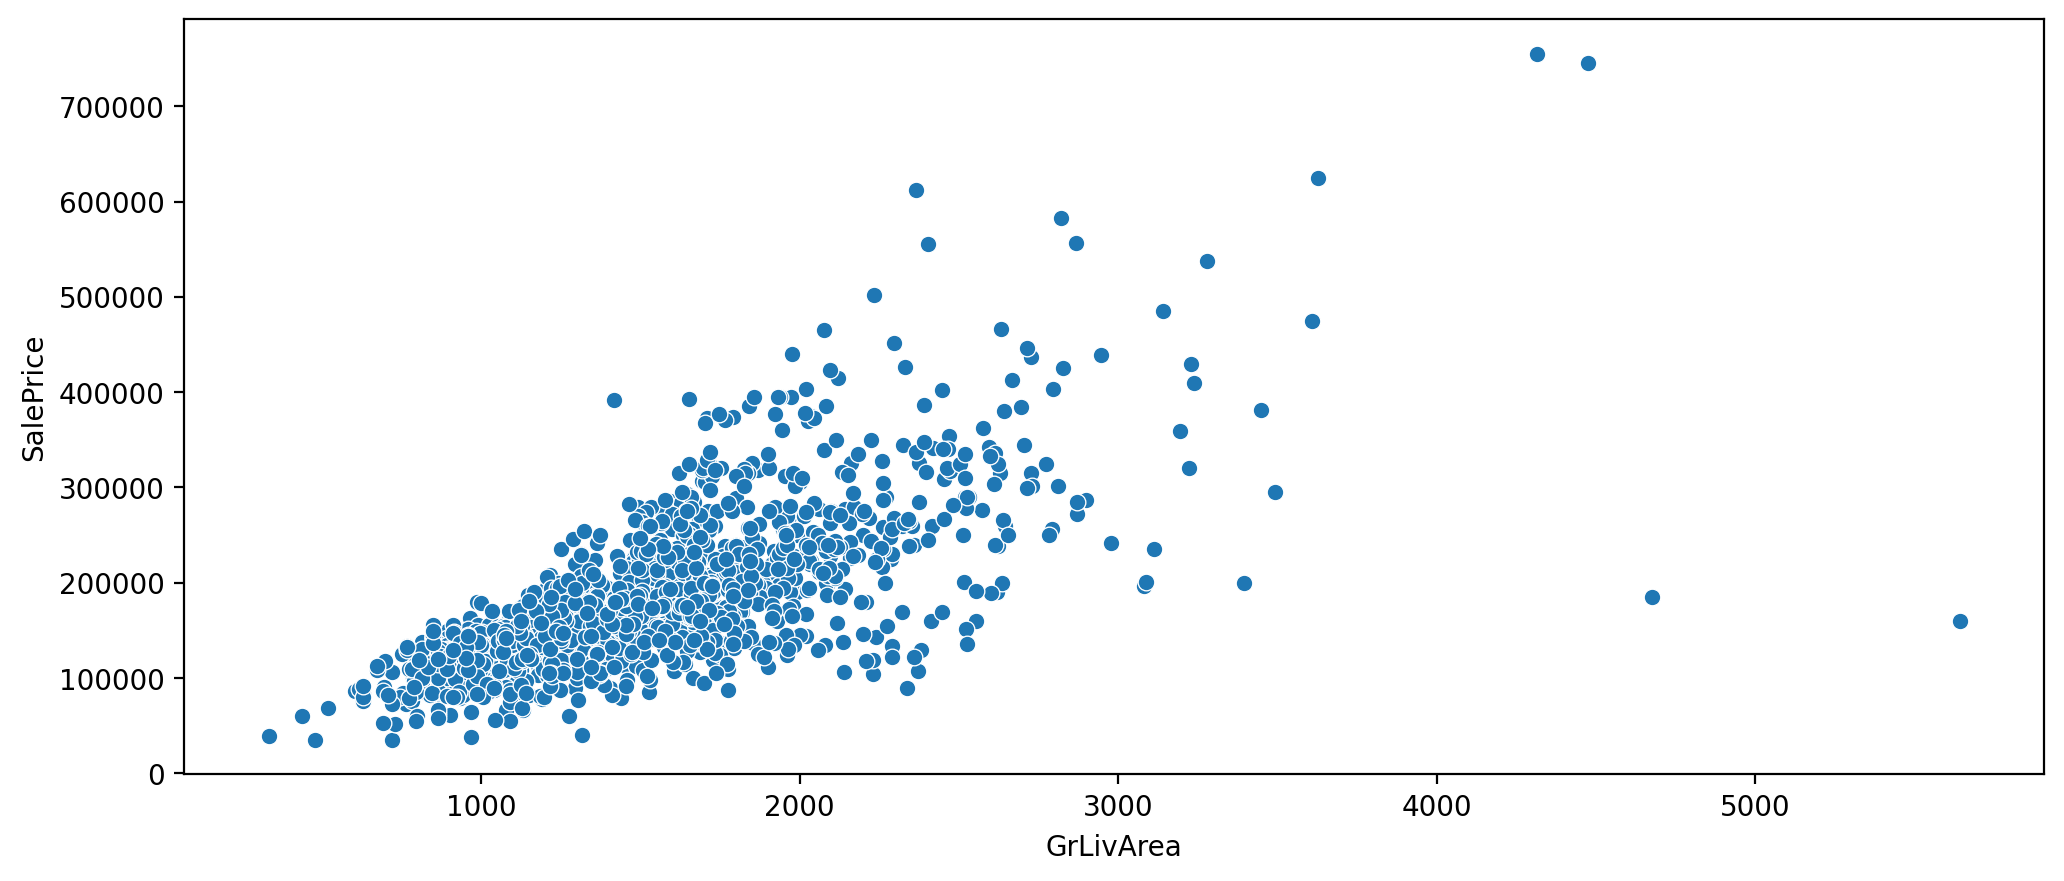

In [94]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df,x='GrLivArea',y='SalePrice')

In [95]:
drop_index = df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index

In [96]:
df = df.drop(drop_index,axis=0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

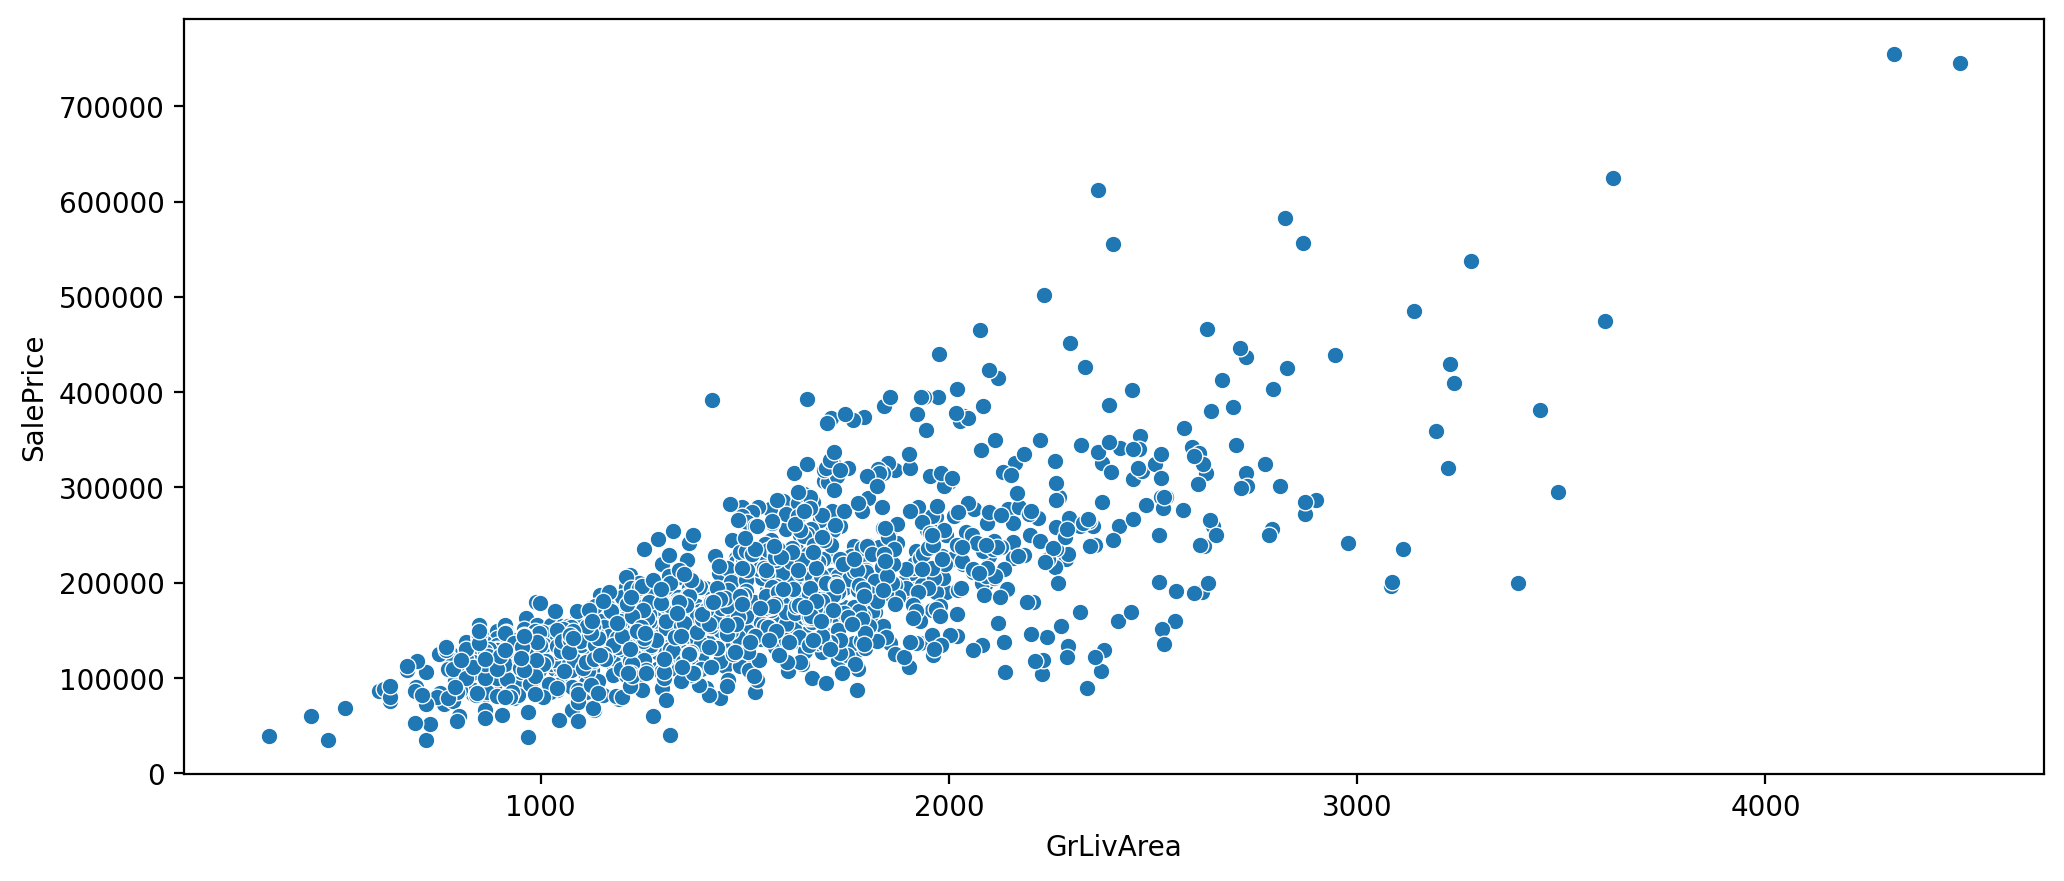

In [97]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df,x='GrLivArea',y='SalePrice')

In [98]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    total_percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return total_percent_nan

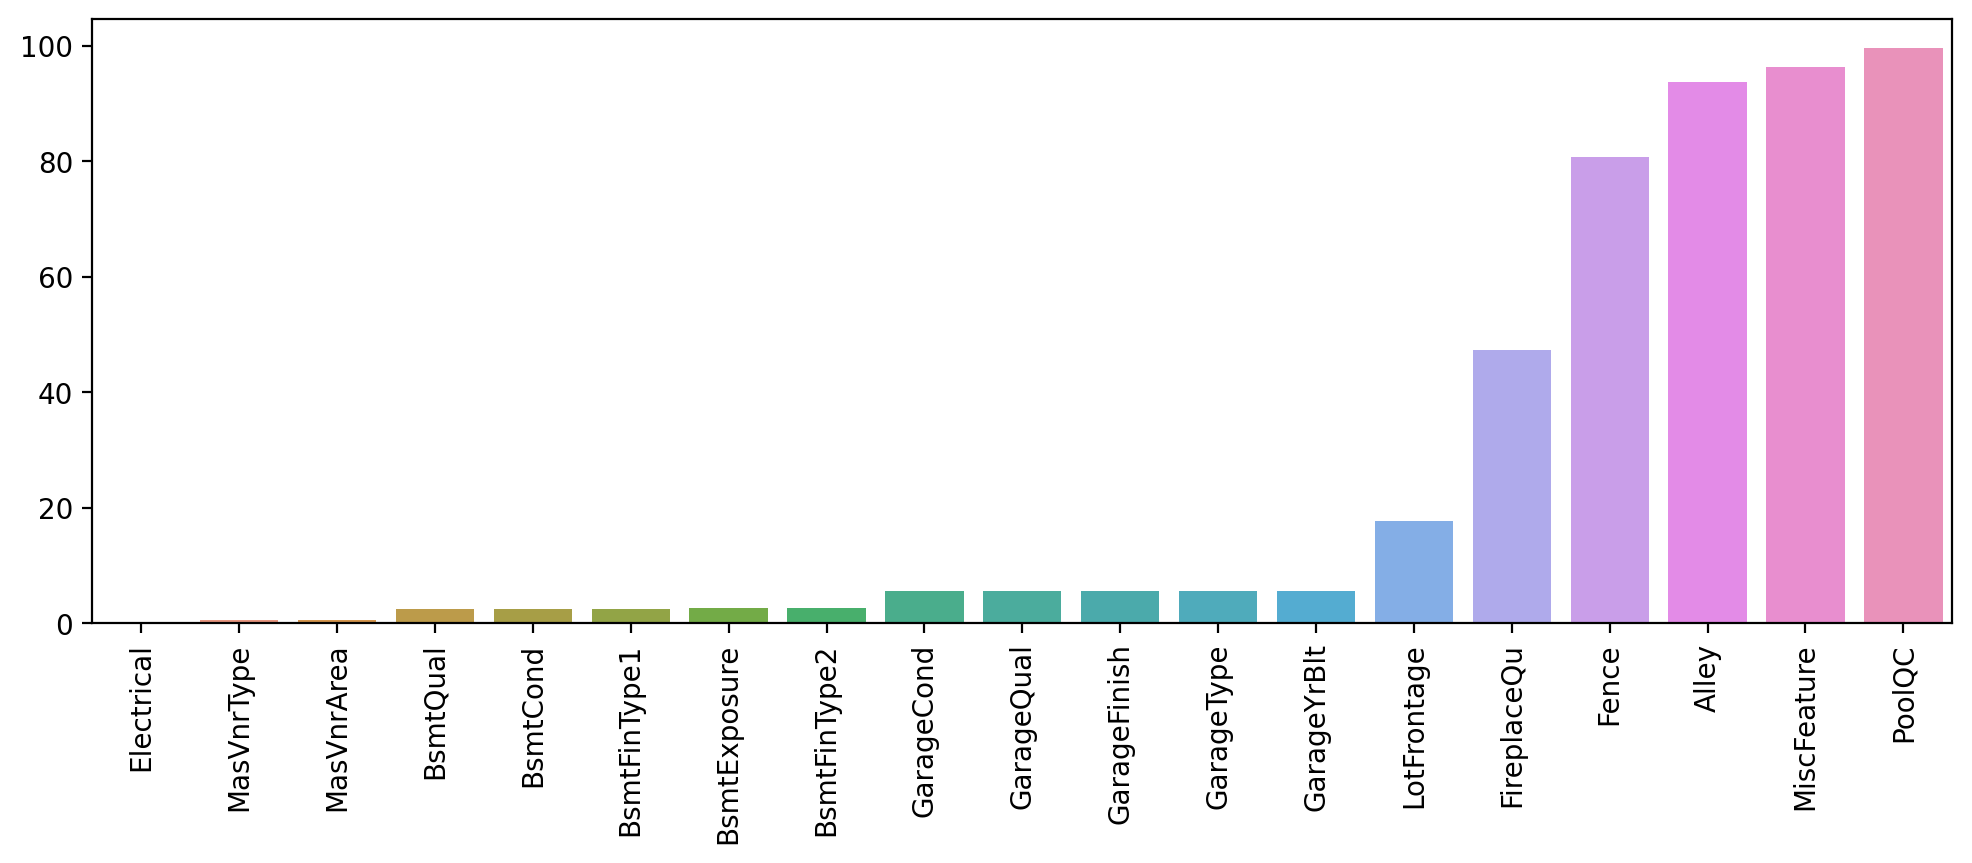

In [99]:
percent_nan = percent_missing(df)

plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

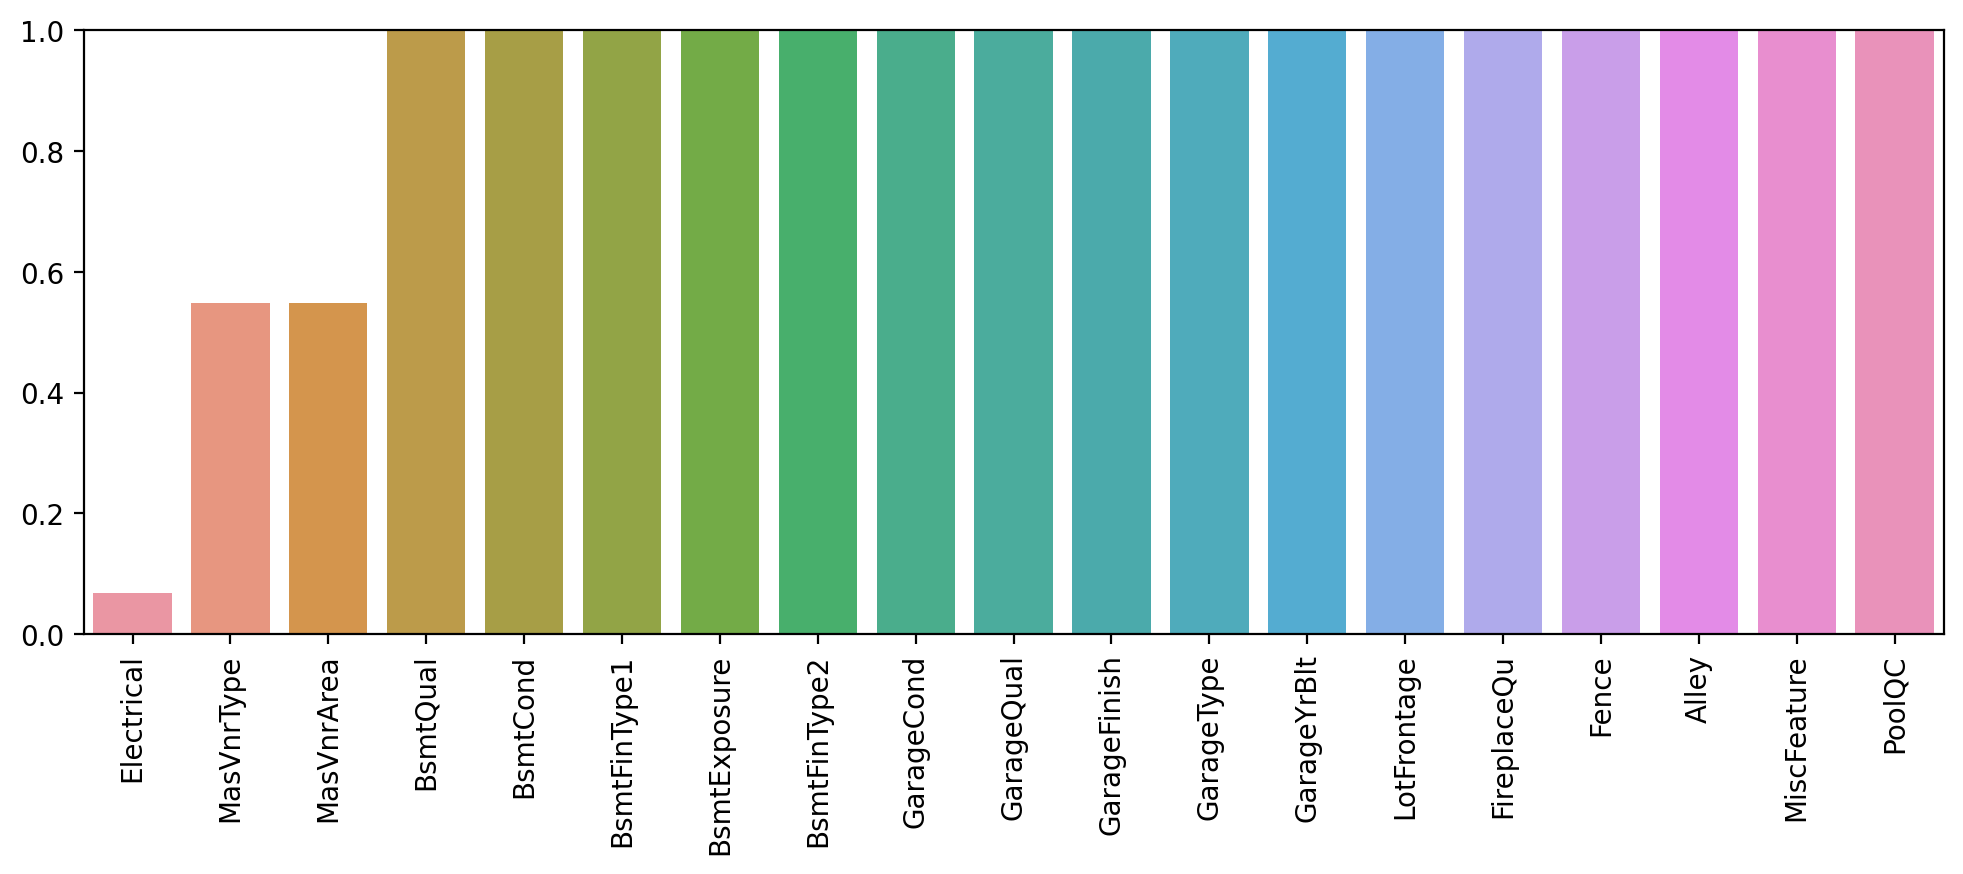

In [100]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

In [101]:
percent_nan[percent_nan<1]

Electrical    0.068587
MasVnrType    0.548697
MasVnrArea    0.548697
dtype: float64

In [102]:
df = df.dropna(axis=0,subset=['Electrical'])

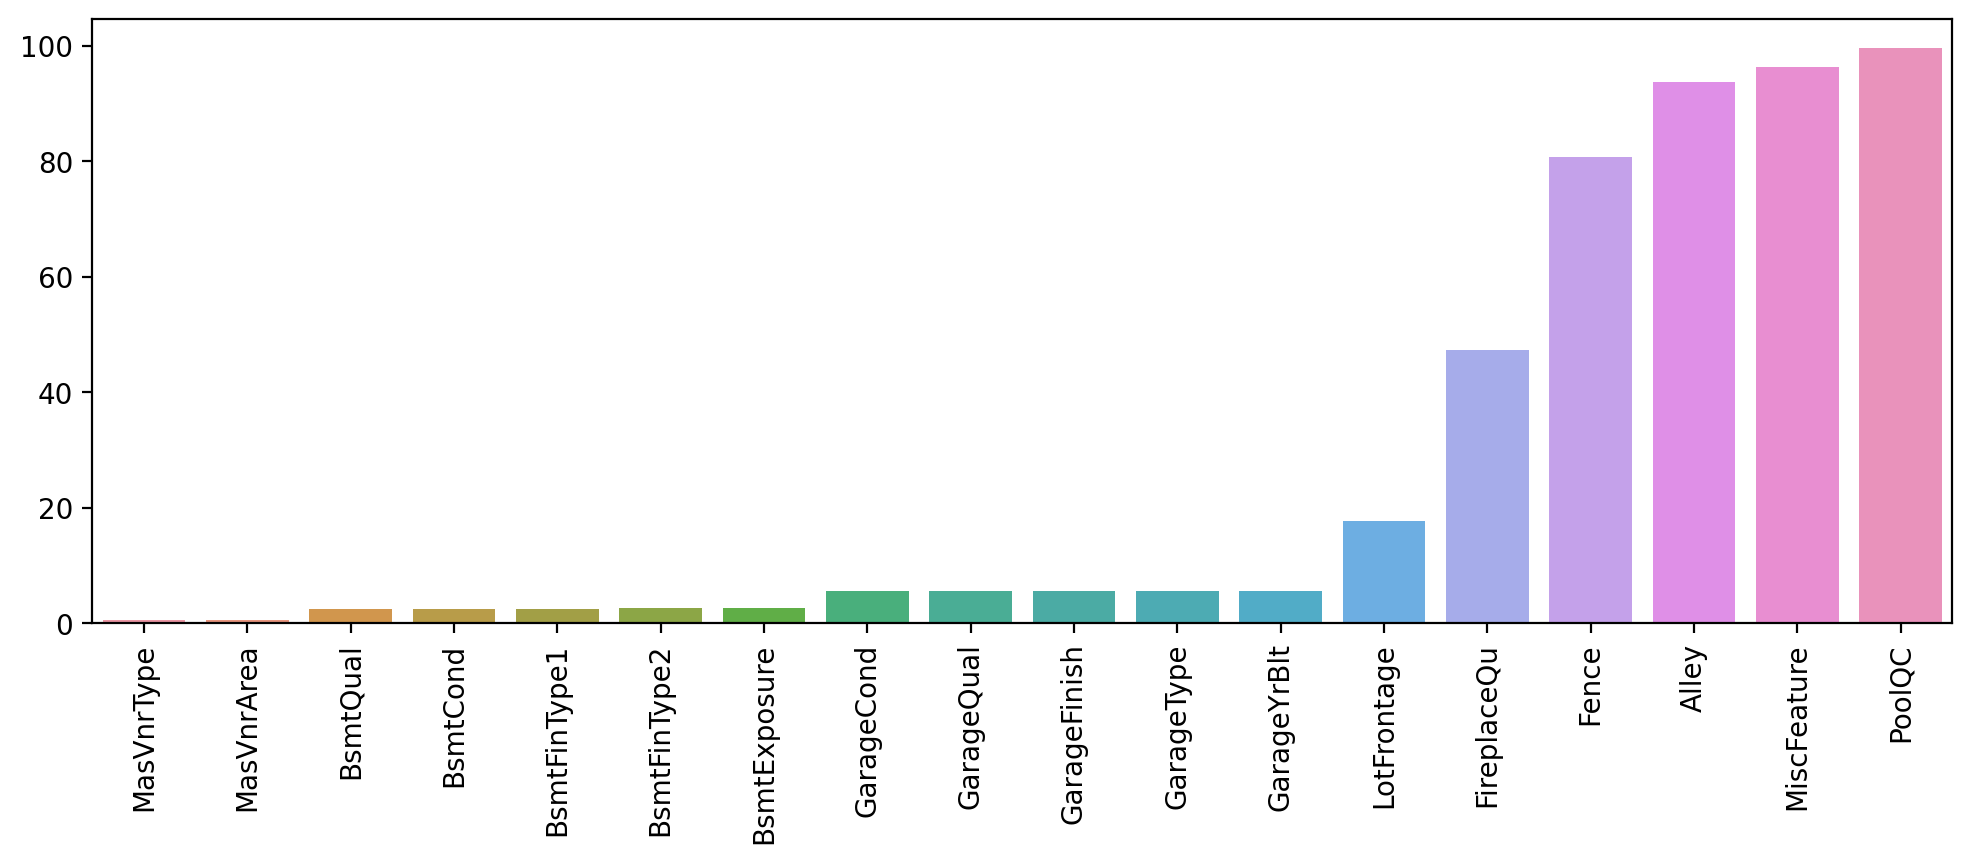

In [103]:
percent_nan = percent_missing(df)

plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [104]:
percent_nan

MasVnrType       0.549073
MasVnrArea       0.549073
BsmtQual         2.539465
BsmtCond         2.539465
BsmtFinType1     2.539465
BsmtFinType2     2.608099
BsmtExposure     2.608099
GarageCond       5.559369
GarageQual       5.559369
GarageFinish     5.559369
GarageType       5.559369
GarageYrBlt      5.559369
LotFrontage     17.776253
FireplaceQu     47.288950
Fence           80.713795
Alley           93.754290
MiscFeature     96.293754
PoolQC          99.588195
dtype: float64

In [105]:
df = df.drop(['PoolQC','Alley','MiscFeature','Fence'],axis=1)

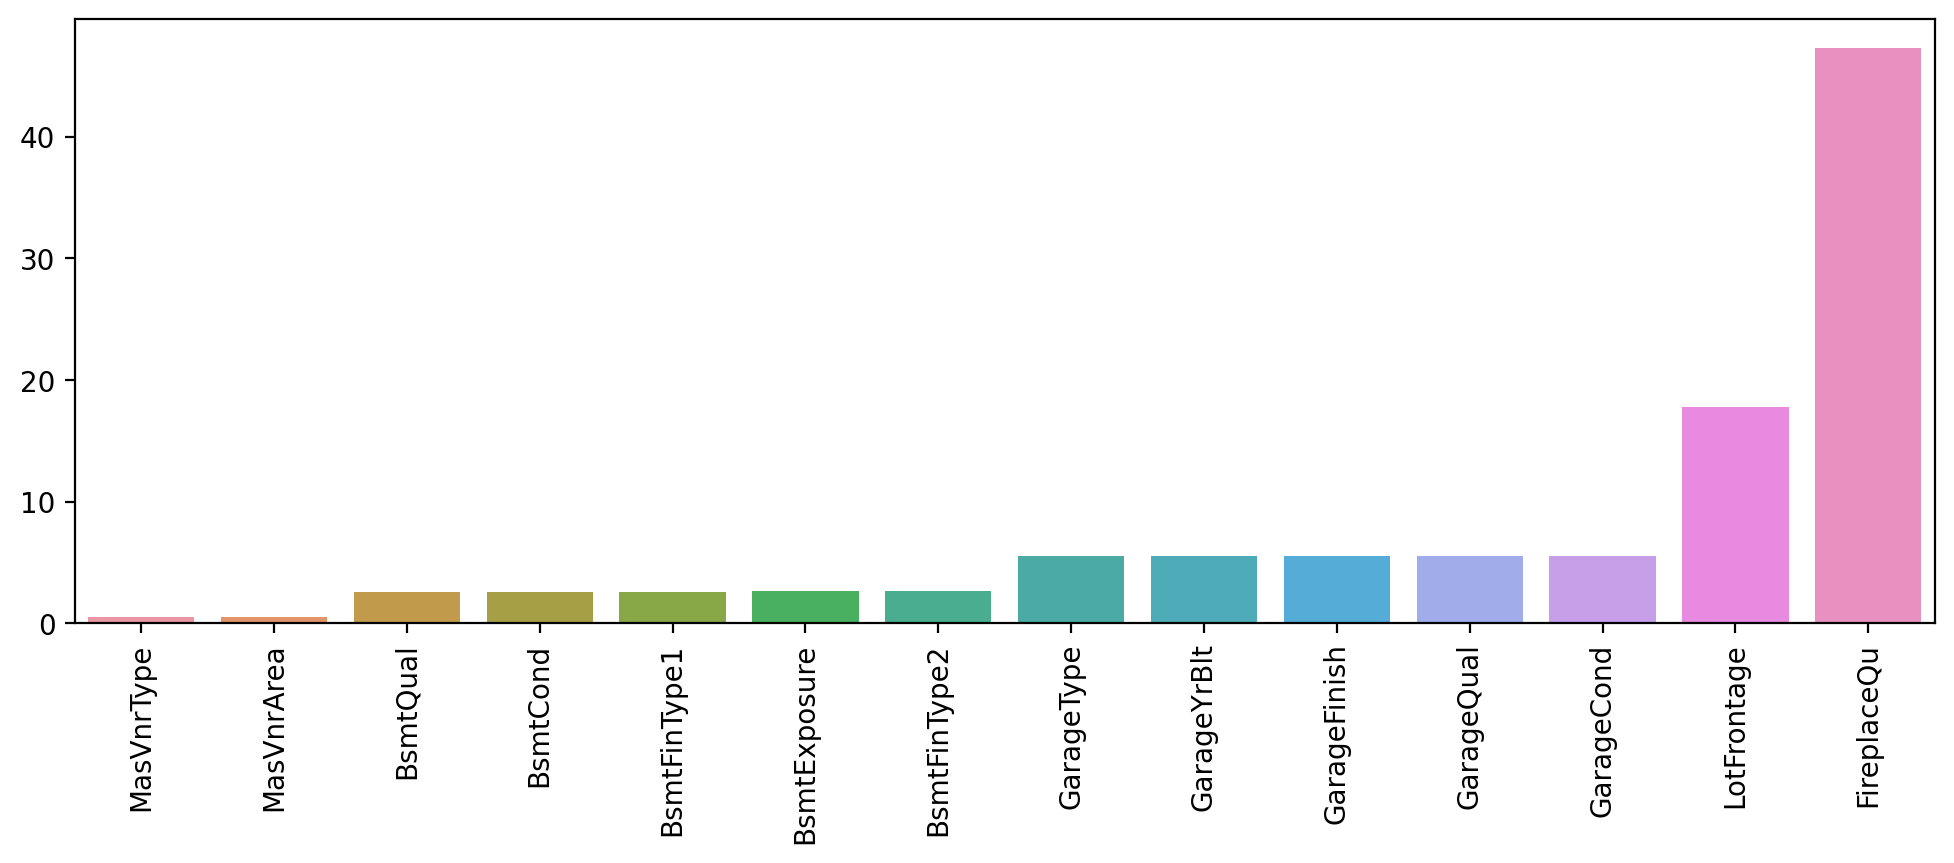

In [106]:
percent_nan = percent_missing(df)

plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [107]:
# in basment column fill na with 0
basmt_num_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','TotalBsmtSF']
df[basmt_num_cols] = df[basmt_num_cols].fillna(0)

# in string basment column fill na with None
basmt_str_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',]
df[basmt_str_cols] = df[basmt_str_cols].fillna('None')

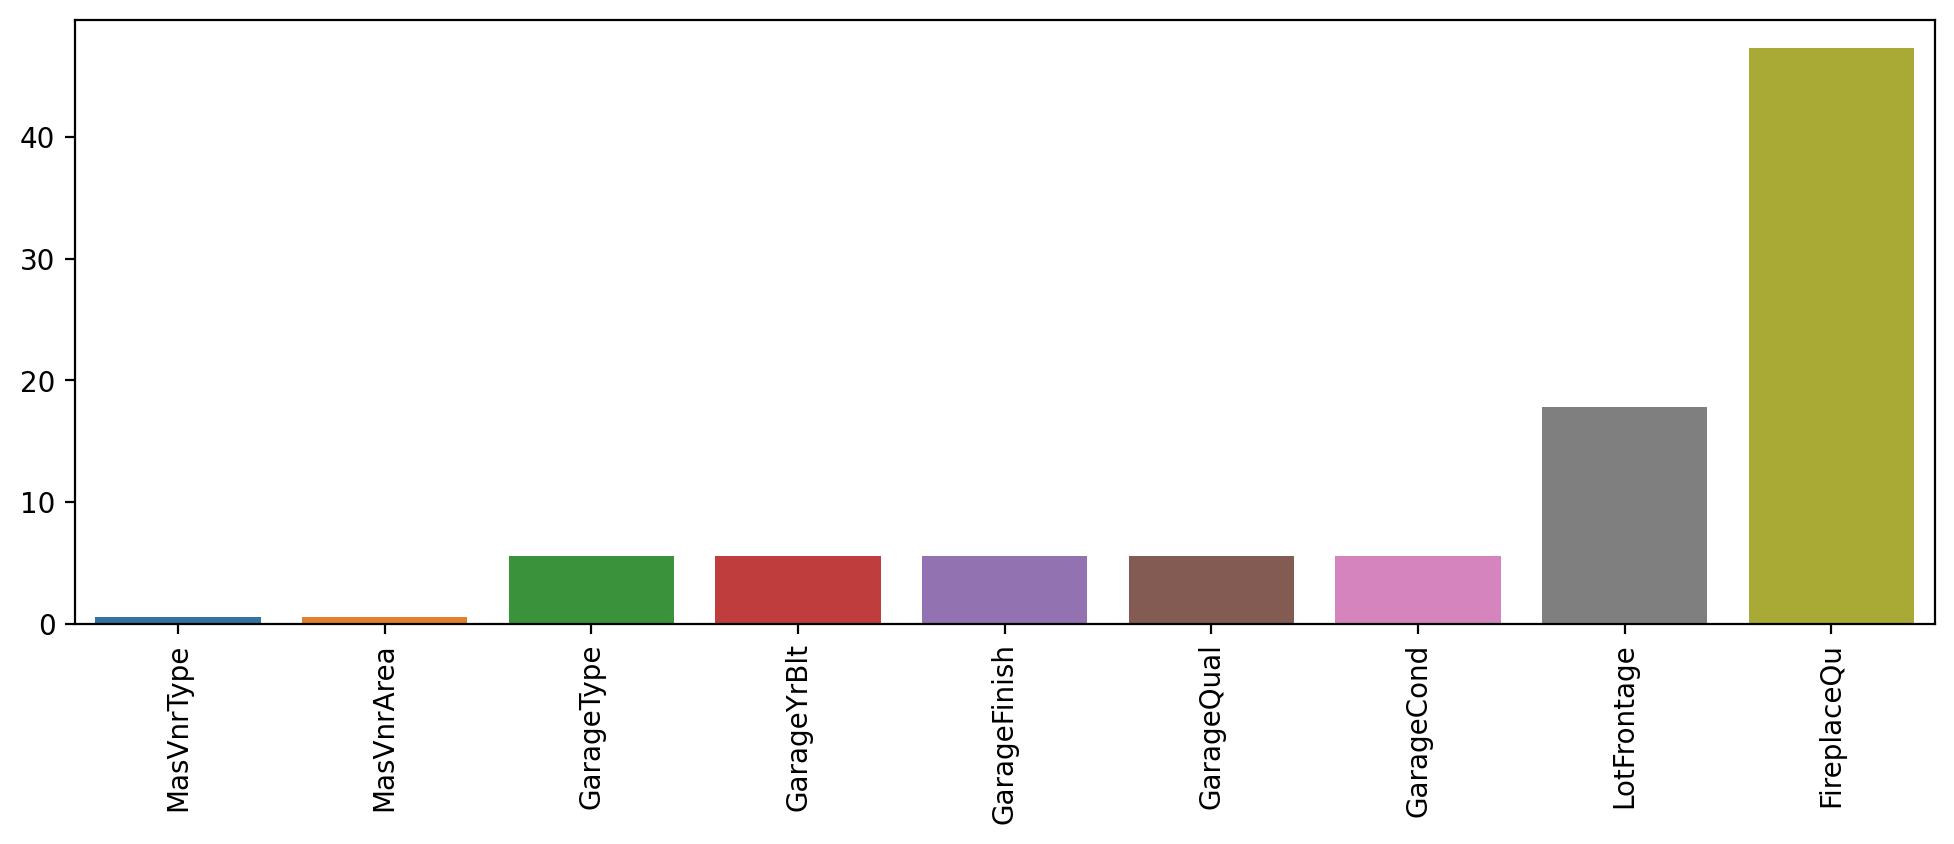

In [108]:
percent_nan = percent_missing(df)

plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [109]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [110]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0) 

In [111]:
garage_str_cold = ['GarageType','GarageFinish','GarageQual','GarageCond']
df[garage_str_cold] = df[garage_str_cold].fillna("None")

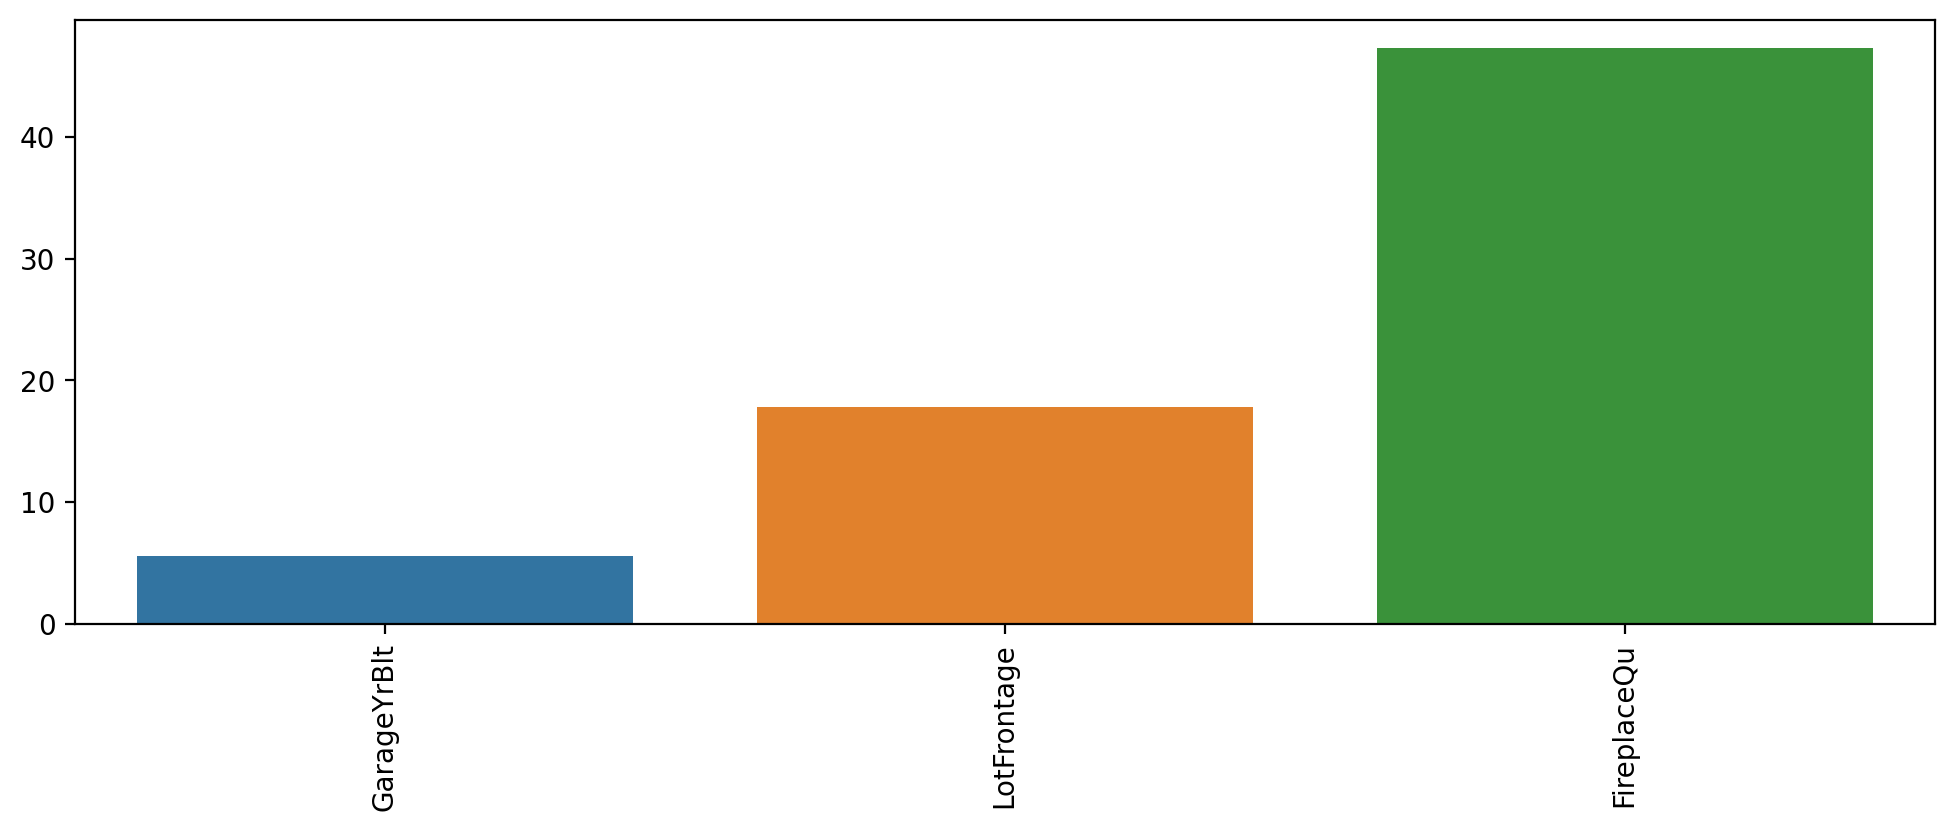

In [112]:
percent_nan = percent_missing(df)

plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [113]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [114]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

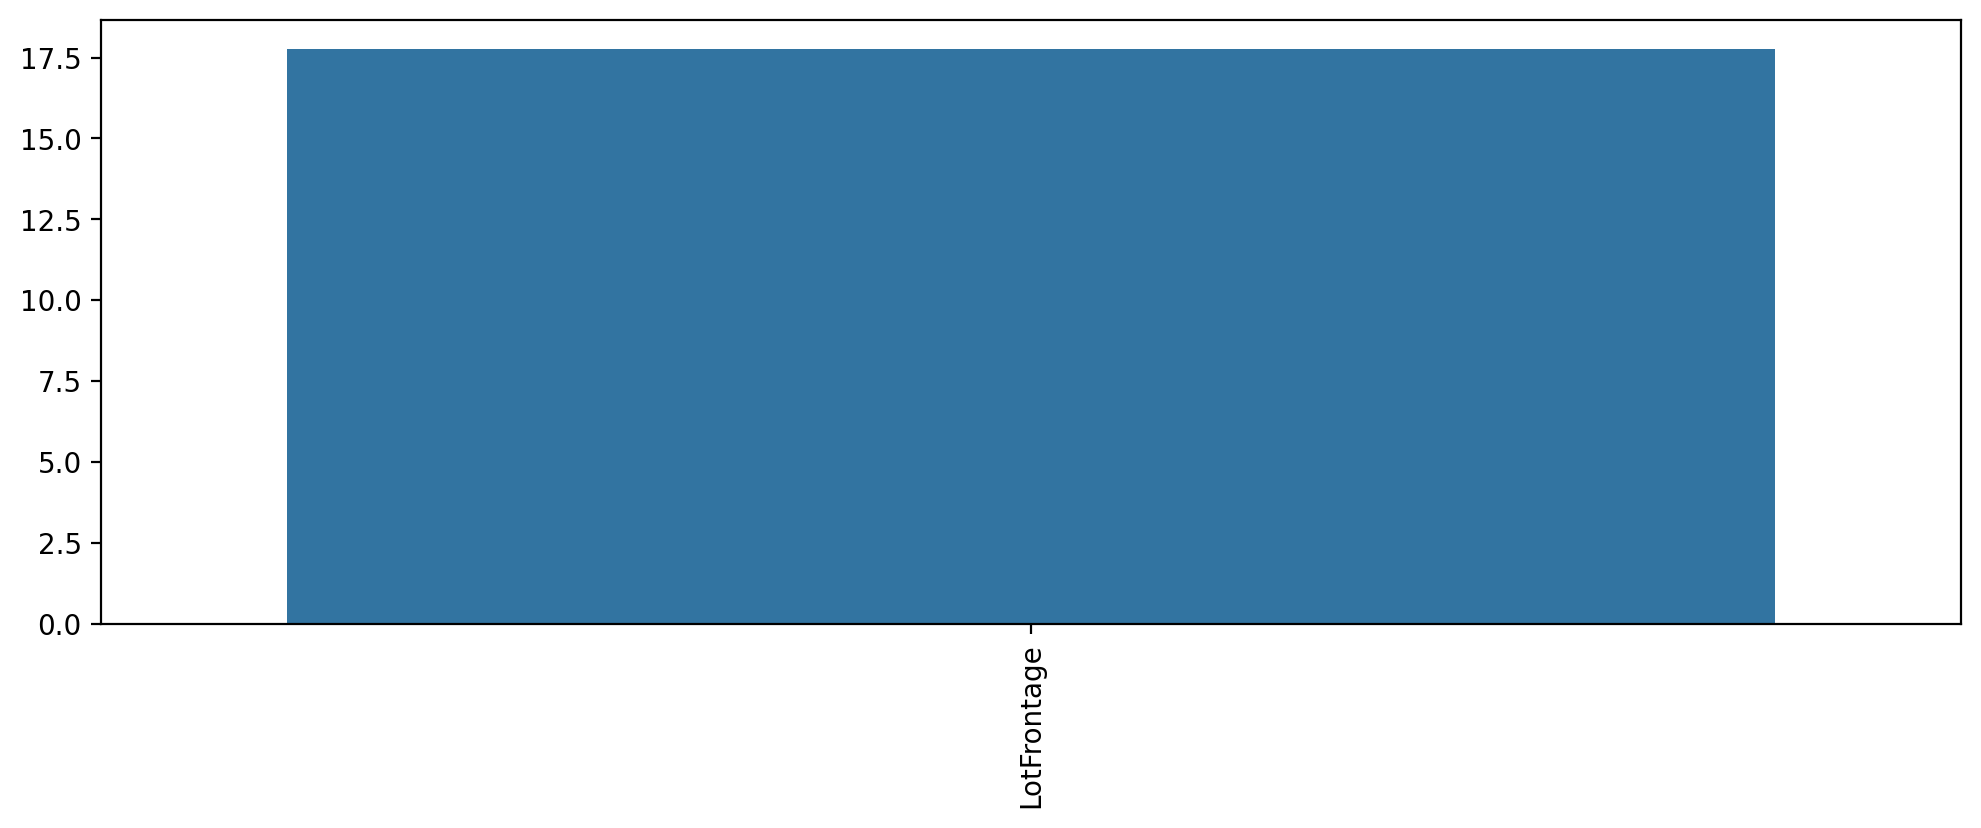

In [115]:
percent_nan = percent_missing(df)

plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [116]:
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1457, dtype: float64

In [119]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [130]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1457 non-null   int64  
 1   MSSubClass     1457 non-null   object 
 2   MSZoning       1457 non-null   object 
 3   LotFrontage    1457 non-null   float64
 4   LotArea        1457 non-null   int64  
 5   Street         1457 non-null   object 
 6   LotShape       1457 non-null   object 
 7   LandContour    1457 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1457 non-null   object 
 10  LandSlope      1457 non-null   object 
 11  Neighborhood   1457 non-null   object 
 12  Condition1     1457 non-null   object 
 13  Condition2     1457 non-null   object 
 14  BldgType       1457 non-null   object 
 15  HouseStyle     1457 non-null   object 
 16  OverallQual    1457 non-null   int64  
 17  OverallCond    1457 non-null   int64  
 18  YearBuil

In [131]:
my_numeric_df = df.select_dtypes(exclude='object')

In [134]:
my_object_df = df.select_dtypes(include='object')

In [136]:
dummy_df = pd.get_dummies(my_object_df,drop_first=True)

In [138]:
final_df = pd.concat([my_numeric_df,dummy_df],axis=1)

In [140]:
final_df.to_csv('Housing_Test_Data.csv')

In [144]:
final_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [171]:
test_df = pd.read_csv('test.csv')

In [172]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [173]:
percent_nun= percent_missing(test_df)

In [174]:
test_df = test_df.drop(['PoolQC','Alley','MiscFeature','Fence'],axis=1)

# in basment column fill na with 0
basmt_num_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','TotalBsmtSF']
test_df[basmt_num_cols] = test_df[basmt_num_cols].fillna(0)

# in string basment column fill na with None
basmt_str_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',]
test_df[basmt_str_cols] = test_df[basmt_str_cols].fillna('None')

garage_str_cold = ['GarageType','GarageFinish','GarageQual','GarageCond']
test_df[garage_str_cold] = test_df[garage_str_cold].fillna("None")

test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')

test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)

test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('None')

test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)

In [189]:
percent_nun= percent_missing(test_df)

In [190]:
percent_nun

Series([], dtype: float64)

In [188]:
test_df = test_df.dropna(axis=0,subset=['Exterior1st','Exterior2nd','GarageArea','SaleType','Functional','MSZoning','Utilities','KitchenQual'])

In [191]:
len(test_df)

1449

In [192]:
my_numeric_test_df = test_df.select_dtypes(exclude='object')

my_object_test_df = test_df.select_dtypes(include='object')

dummy_test_df = pd.get_dummies(my_object_test_df,drop_first=True)

final_df = pd.concat([my_numeric_test_df,dummy_test_df],axis=1)

In [193]:
final_df

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [194]:
final_df.to_csv("Final_test_Data.csv")

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vishal\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vishal\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vishal\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vishal\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly clos